In [12]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

In [136]:
print(cv2.__version__)
print(np.__version__)
print(pd.__version__)

4.0.1
1.21.2
1.2.4


In [137]:
from platform import python_version
python_version()

'3.8.8'

In [3]:
# To read the image
input_image = "C:\\Users\\DELL\\Documents\\Python Scripts\\SPE\\satimg1.jpg"
img = cv2.imread(input_image, cv2.IMREAD_COLOR)

In [4]:
# Creating GUI window to display an image on screen
# first Parameter is windows title (should be in string format)
# Second Parameter is image array
cv2.imshow(input_image, img)

In [109]:
# It is for removing/deleting created GUI window from screen and memory
cv2.destroyAllWindows()

In [7]:
# Converting Image from RGB to HSV colour space
# OpenCV loads an image where the order of the color channels is Blue, Green, Red (BGR) instead of RGB
hsvImg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imshow('RGB image', img)
cv2.imshow('HSV image', hsvImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

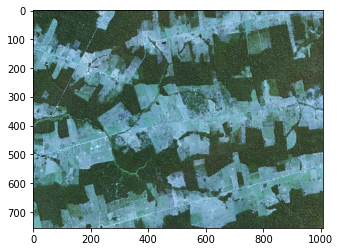

In [15]:
# Displaying Original Img (in BGR)
plt.imshow(img)
plt.show()

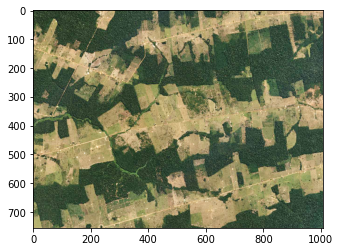

In [14]:
# Displaying the image after converting it from BGR to RGB
rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)
plt.show()

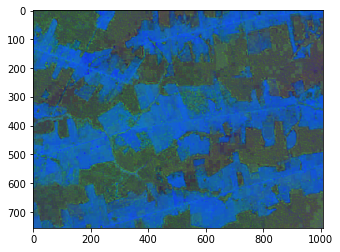

In [82]:
plt.imshow(hsvImg)
plt.show()

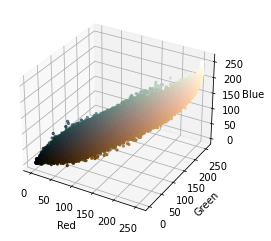

In [17]:
# Visualizing the Image in RGB Color Space
r, g, b = cv2.split(rgbImg)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = rgbImg.reshape((np.shape(rgbImg)[0]*np.shape(rgbImg)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

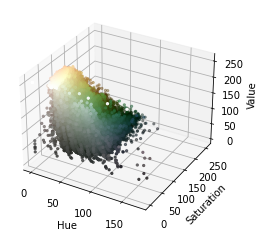

In [18]:
# Generating the colored 3d scatter plot for the image in HSV
h, s, v = cv2.split(hsvImg)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [83]:
# https://realpython.com/python-opencv-color-spaces/
# Picking out a range of greens 
# In RGB range
# light_green = (0, 200, 0)
# dark_green = (0, 40, 0)

# In HSV range
# https://toolstud.io/color/rgb.php?rgb_r=0&rgb_g=40&rgb_b=0&convert=rgbdec
#light_green = (120, 100, 78.4)
#dark_green = (120, 100, 15.7)

# By just looking at that scatterplot
#light_green = (50, 200, 200)
#dark_green = (100, 220, 50)

# referred - https://stackoverflow.com/questions/72124272/how-to-detect-the-exact-color-of-the-images-using-hsv-color-model-and-opencv
light_green = (40, 50, 70)
dark_green = (70, 250, 250)

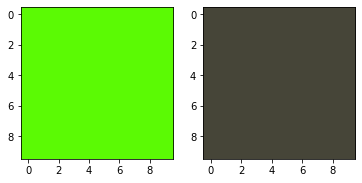

In [84]:
from matplotlib.colors import hsv_to_rgb

lg_square = np.full((10, 10, 3), light_green, dtype=np.uint8) / 255.0
dg_square = np.full((10, 10, 3), dark_green, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
#plt.imshow(dg_square)
plt.imshow(hsv_to_rgb(dg_square))
plt.subplot(1, 2, 2)
#plt.imshow(lg_square)
plt.imshow(hsv_to_rgb(lg_square))
plt.show()

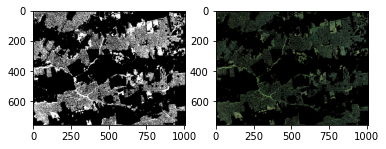

In [111]:
# It returns a binary mask (an ndarray of 1s and 0s) the size of the image where 
# The inRange() function returns an array consisting of elements equal to 0 if the elements of the source array 
# lie between the elements of the two arrays representing the upper bounds and the lower bounds.
# 0 - white, 1 - black
mask = cv2.inRange(hsvImg, light_green, dark_green)

# To impose the mask on top of the original image
result = cv2.bitwise_and(rgbImg, rgbImg, mask=mask)

# viewing both the mask and the original image with the mask on top
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

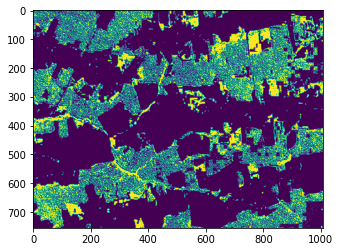

In [118]:
plt.imshow(mask)
plt.show()

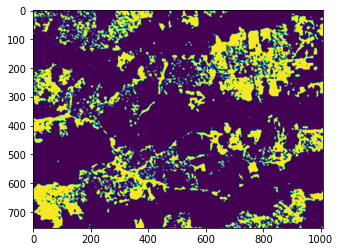

In [119]:
# applying median filter to reduce noise and preserve edges in image
median_filter = cv2.medianBlur(mask, 7)
plt.imshow(median_filter)
plt.show()

In [126]:
# applying area thresholding to reduce the intraclass variance of the black and white pixels

# Otsu's thresholding after Median filtering

# Otsu’s method is an adaptive thresholding way for binarization in image processing. 
# It can find the optimal threshold value of the input image by going through all possible threshold values (from 0 to 255).
# refer - https://hbyacademic.medium.com/otsu-thresholding-4337710dc519

#ret,th = cv2.threshold(median_filter,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#median_filter_gray = cv2.cvtColor(median_filter, cv2.COLOR_BGR2GRAY)
ret, thresh1 = cv2.threshold(median_filter, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)   

In [125]:
median_filter.shape

(756, 1008)

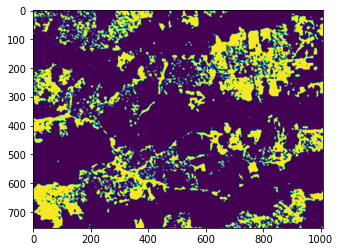

In [127]:
plt.imshow(thresh1)
plt.show()

In [128]:
thresh1.shape

(756, 1008)

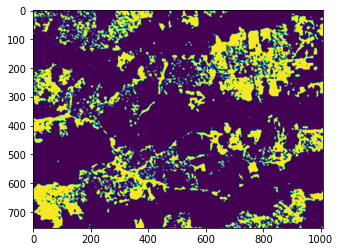

In [130]:
# converting to its binary form
img_binary = cv2.threshold(thresh1, 127, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_binary)
plt.show()

In [131]:
# counting the number of pixels
number_of_white_pix = np.sum(img_binary == 255)
number_of_black_pix = np.sum(img_binary == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 177417
Number of black pixels: 584631


In [ ]:
# check this - https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv

In [132]:
# counting the number of pixels
number_of_white_pix = np.sum(mask == 255)
number_of_black_pix = np.sum(mask == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

Number of white pixels: 189640
Number of black pixels: 572408
